<a href="https://colab.research.google.com/github/pranjalmankar2004/CodeAlpha_Project_Name/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic classification**
To make a system which tells whether the person will be safe from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

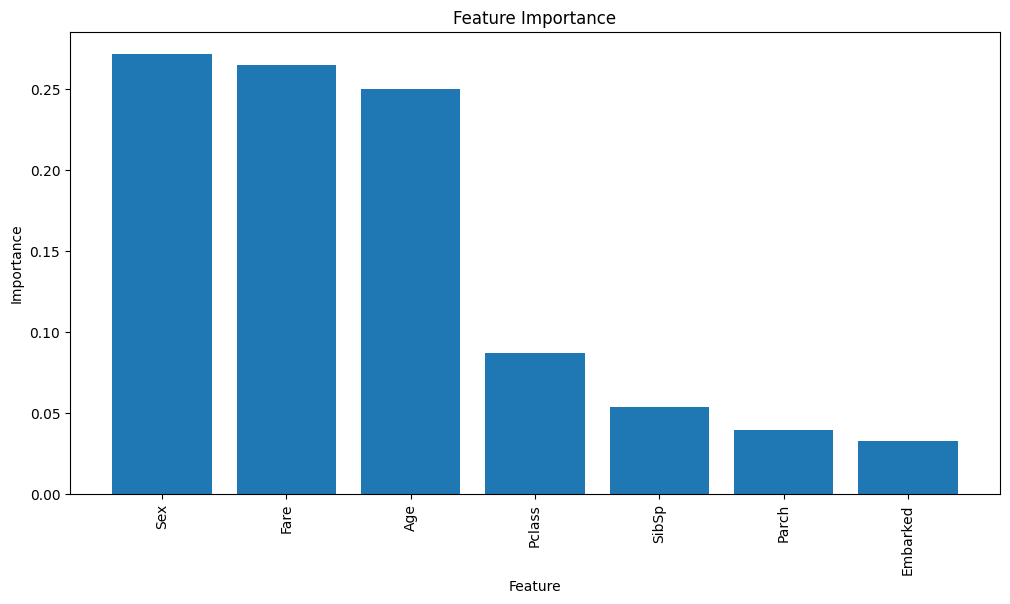

Sex: 0.27141040486293694
Fare: 0.2650103090844888
Age: 0.24999524823781627
Pclass: 0.08695697201791765
SibSp: 0.05368549482434098
Parch: 0.03989732652401987
Embarked: 0.0330442444484796


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/titanic.csv'
titanic_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(titanic_data.head())

# Data Preprocessing
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_features = ['Sex', 'Embarked']
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    titanic_data[feature] = label_encoders[feature].fit_transform(titanic_data[feature])

# Drop irrelevant columns
titanic_data.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Feature Scaling
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Split the data into training and testing sets
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Feature Importance Analysis
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

# Interpretation
for i in indices:
    print(f"{features[i]}: {importances[i]}")
